In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load the dataset into dataframe
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

In [3]:
# Quick Overview of Dataset
df.head()

Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0

In [4]:
df.tail()

Year Month_Name       Date                     State  \
96840  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96841  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96842  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96843  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96844  2023.0        dec  12/1/2023  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
96840                          MOTOR CAR       4-Wheelers  4W_Personal   
96841  MOTOR CYCLE/SCOOTER-USED FOR HIRE       2-Wheelers    2W_Shared   
96842                           OMNI BUS              Bus          Bus   
96843              THREE WHEELER (GOODS)       3-Wheelers     3W_Goods   
96844          THREE WHEELER (PASSENGER)       3-Wheelers    3W_Shared   

       EV_Sales_Quantity  
96840                1.0  
96841                5.0  
96842                0.0  
96843                0.0  
96844                0.0

Year: The calendar year in which the sales were recorded.

Month_Name: The name of the month during which the sales transaction took place.

Date: The specific date of the sales transaction, providing day-level granularity.

State: The Indian state where the sales were reported, enabling geographic analysis.

Vehicle_Class: The classification of the vehicle, such as Sedan, SUV, Hatchback, etc., indicating design and market segment.

Vehicle_Category: The functional category of the vehicle, distinguishing between commercial and passenger vehicles.

Vehicle_Type: The general type of vehicle, such as 2-wheeler or 4-wheeler, useful for understanding mobility patterns.

EV_Sales_Quantity: The number of electric vehicles (EVs) sold, serving as a key metric for tracking EV adoption.

In [5]:
# number of rows and columns
df.shape

(96845, 8)

In [6]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [7]:
#check which Year data are present
df['Year'].value_counts()

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

Electric vehcile data is from year 2014 to 2024

In [8]:
# Which State data are given
df['State'].value_counts()

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [9]:
# check for nan values in each columns
df.isna().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

There are no missing values.

In [10]:
# to check duplicate values
df[df.duplicated()]

Empty DataFrame
Columns: [Year, Month_Name, Date, State, Vehicle_Class, Vehicle_Category, Vehicle_Type, EV_Sales_Quantity]
Index: []

There are no duplicate values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [12]:
#The Year column is currently of type float. To ensure accurate representation and enable integer-based operations, we will convert its data type to int.
df['Year'] = df['Year'].astype(int)

In [13]:
#The Date column is currently of type object. To ensure accurate representation and enable date-based operations, we will convert its data type to date.
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [14]:
# To convert some column to  catagorical
catagorical_columns = [ 'Month_Name', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type']
df[catagorical_columns] = df[catagorical_columns].astype('category')

In [15]:
# Now again check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1)
memory usage: 2.3 MB


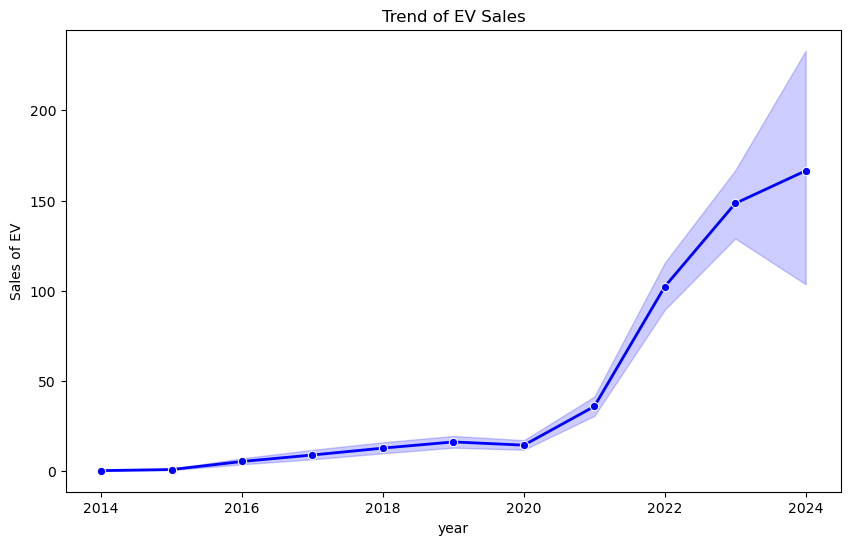

In [16]:
#visulization : To check the trend of sales of EV
plt.figure(figsize = (10,6))
sns.lineplot(data = df,x = 'Year', y = 'EV_Sales_Quantity',color = 'blue' ,marker='o' , linestyle= '-',linewidth = 2)
plt.title("Trend of EV Sales")
plt.xlabel("year")
plt.ylabel("Sales of EV")
plt.show()

From 2021 to 2024, electric vehicle sales experienced a sharp upward trajectory, reflecting increased consumer adoption and supportive policy interventions.

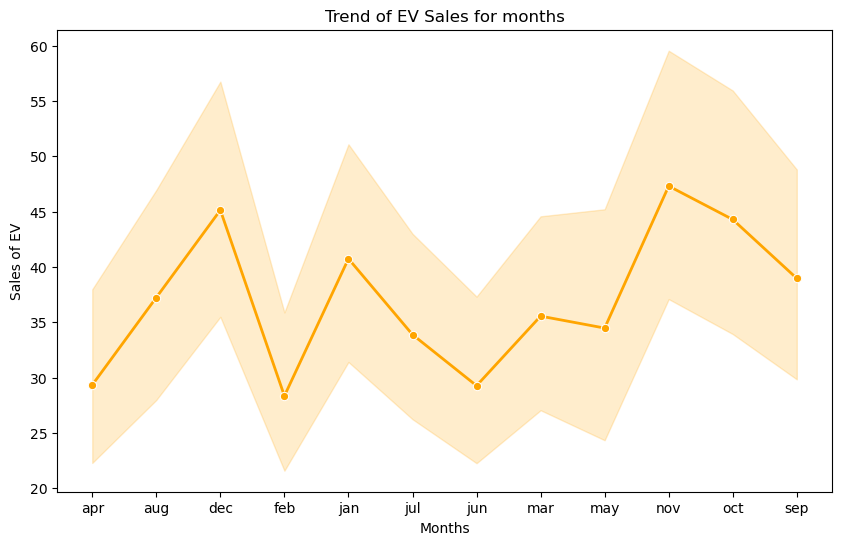

In [17]:
# In which month sales are higher
plt.figure(figsize = (10,6))
sns.lineplot(data = df,x = 'Month_Name', y = 'EV_Sales_Quantity',color = 'orange' ,marker='o' , linestyle= '-',linewidth = 2)
plt.title("Trend of EV Sales for months")
plt.xlabel("Months")
plt.ylabel("Sales of EV")
plt.show()

The period from September to January consistently shows higher EV sales, suggesting increased demand during year-end and early-year months, possibly driven by festive seasons, policy rollouts, or new model launches.

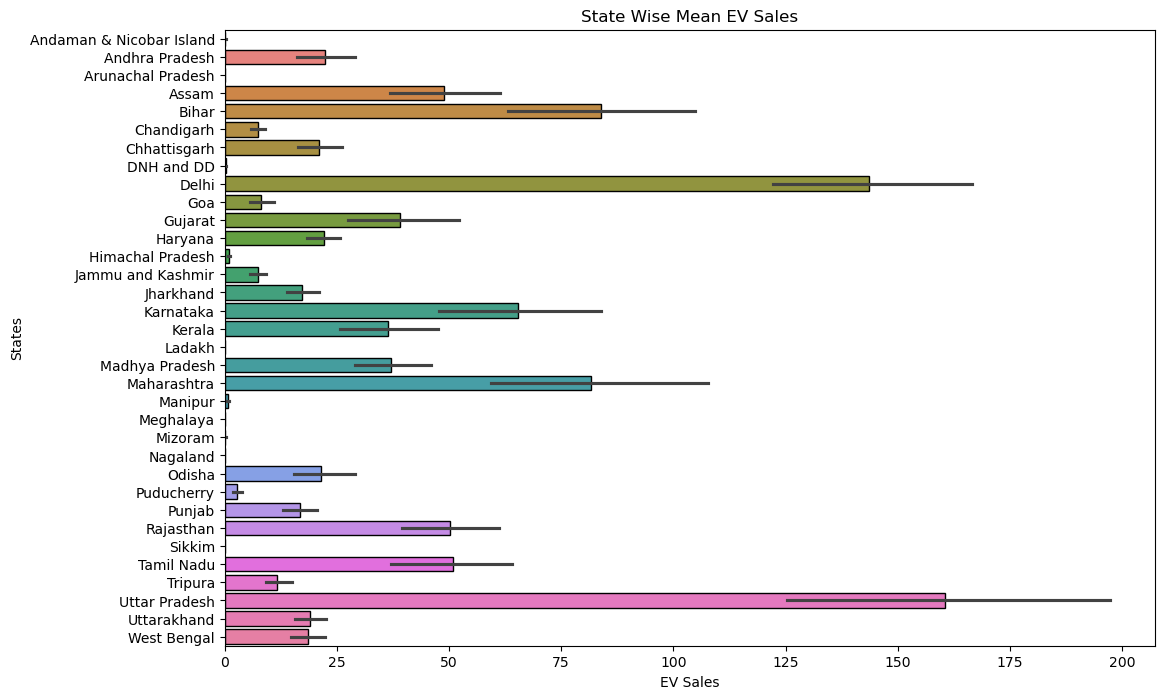

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(data = df,x = 'EV_Sales_Quantity', y = 'State', hue = 'State', edgecolor = 'black' )
plt.title("State Wise Mean EV Sales")
plt.xlabel("EV Sales")
plt.ylabel("States")
plt.show()

EV sales are highest in Uttar Pradesh and Delhi, reflecting strong market penetration and favorable infrastructure or policy support in these regions

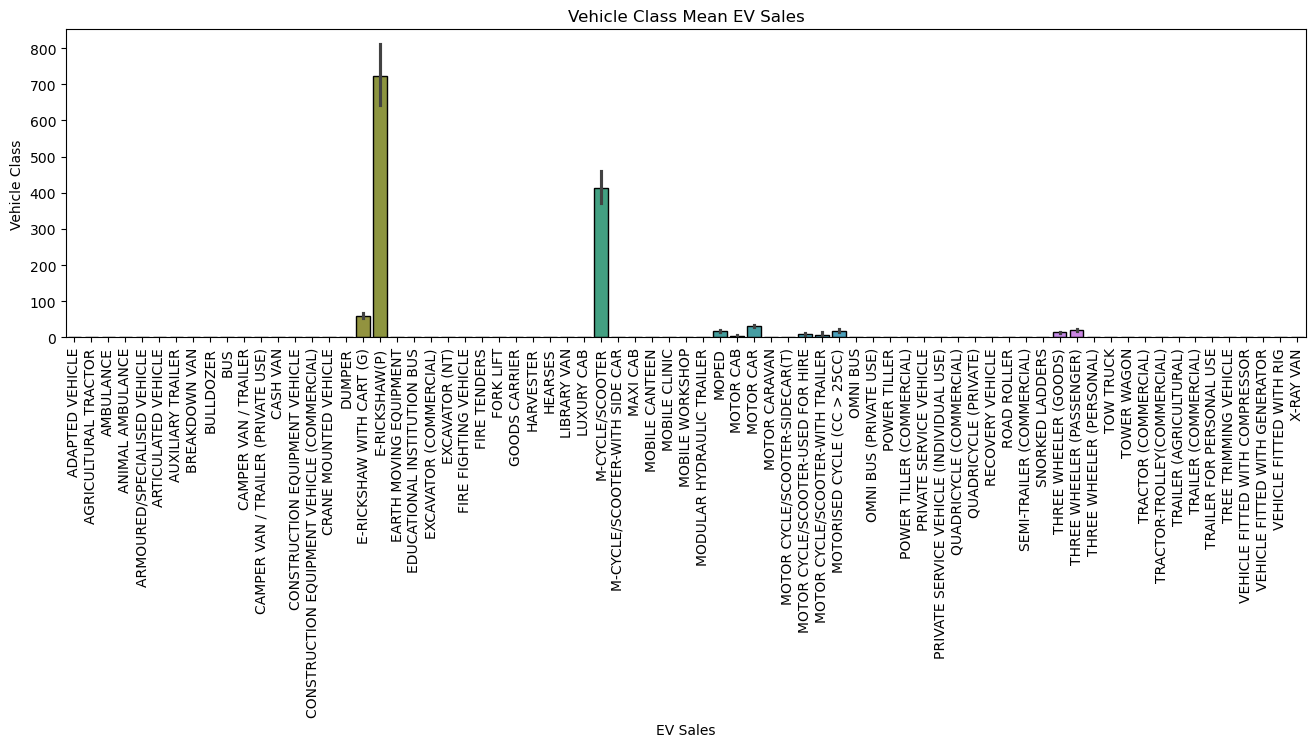

In [19]:
# which Ev class has maximum sales
plt.figure(figsize = (16,4))
sns.barplot(data = df, x = 'Vehicle_Class', y = 'EV_Sales_Quantity', hue = 'Vehicle_Class', edgecolor = 'black' )
plt.title("Vehicle Class Mean EV Sales")
plt.xlabel("EV Sales")
plt.ylabel("Vehicle Class")
plt.xticks(rotation = 90)
plt.show()

Within the vehicle class segment, E-rickshaws have recorded the highest sales, highlighting their widespread adoption and dominance in the electric mobility market.

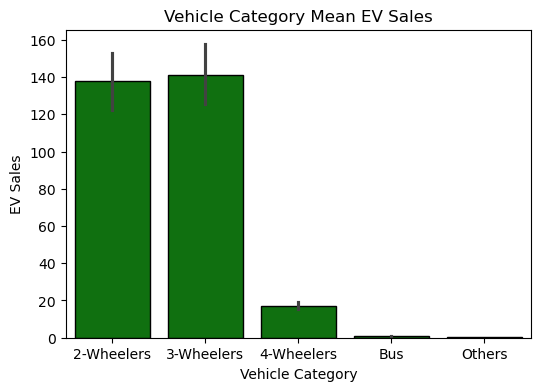

In [20]:
plt.figure(figsize = (6,4))
sns.barplot(data = df, x = 'Vehicle_Category', y = 'EV_Sales_Quantity', color = 'green', edgecolor = 'black' )
plt.title("Vehicle Category Mean EV Sales")
plt.ylabel("EV Sales")
plt.xlabel("Vehicle Category")
plt.show()

The three-wheeler segment holds a dominant position within the overall vehicle category, underscoring its critical role in driving electric mobility, especially for last-mile connectivity and commercial use

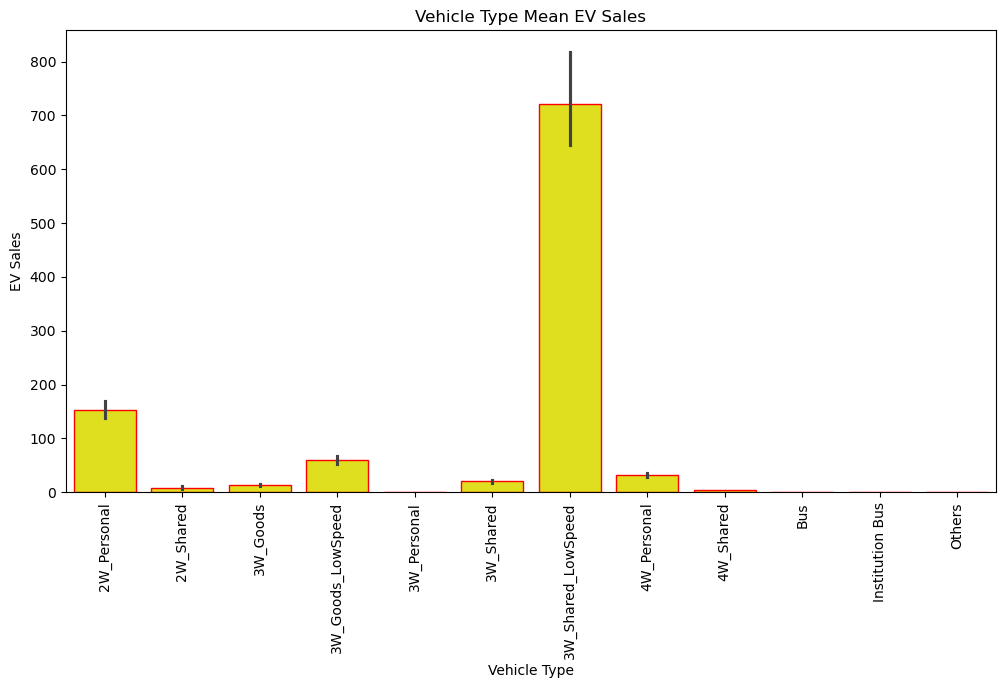

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = 'Vehicle_Type', y = 'EV_Sales_Quantity', color = 'yellow', edgecolor = 'red' )
plt.title("Vehicle Type Mean EV Sales")
plt.ylabel("EV Sales")
plt.xlabel("Vehicle Type")
plt.xticks(rotation = 90) 
plt.show()

In [22]:
#Sales wise top 5 states
top_state = df.groupby("State", observed=False)['EV_Sales_Quantity'].sum().sort_values(ascending = False).reset_index(name = 'Total_Sales')
top_state.head()

State  Total_Sales
0  Uttar Pradesh     732074.0
1    Maharashtra     401535.0
2      Karnataka     315498.0
3          Delhi     268538.0
4      Rajasthan     228573.0

In [23]:
# most common vehicle categories in the dataset
df.groupby("Vehicle_Category", observed=False)['EV_Sales_Quantity'].count().sort_values(ascending = False)

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: EV_Sales_Quantity, dtype: int64

In [24]:
#vehicle type has the highest sales overall
df.groupby("Vehicle_Type", observed=False)['EV_Sales_Quantity'].sum().sort_values(ascending = False)

Vehicle_Type
2W_Personal           1796340.0
3W_Shared_LowSpeed    1408127.0
4W_Personal            130676.0
3W_Goods_LowSpeed       90656.0
3W_Shared               76132.0
3W_Goods                44974.0
4W_Shared               19099.0
2W_Shared               11765.0
Others                   8612.0
Bus                      7009.0
3W_Personal               421.0
Institution Bus             0.0
Name: EV_Sales_Quantity, dtype: float64

In [25]:
# month (on average) sees the highest EV sales
df.groupby("Month_Name", observed=False)['EV_Sales_Quantity'].sum().sort_values(ascending = False)

Month_Name
nov    382217.0
dec    364558.0
jan    360703.0
oct    355083.0
sep    313433.0
mar    299888.0
aug    294022.0
jul    270473.0
may    262747.0
apr    232194.0
jun    229754.0
feb    228739.0
Name: EV_Sales_Quantity, dtype: float64

In [26]:
# What are the top 5 vehicle classes by EV sales quantity
top_vehicle_class = df.groupby("Vehicle_Class", observed=False)['EV_Sales_Quantity'].sum().sort_values(ascending = False).reset_index(name = 'Total_Sales')
top_vehicle_class.head()

Vehicle_Class  Total_Sales
0            M-CYCLE/SCOOTER    1697373.0
1              E-RICKSHAW(P)    1408127.0
2                  MOTOR CAR     130676.0
3   E-RICKSHAW WITH CART (G)      90656.0
4  THREE WHEELER (PASSENGER)      76132.0

In [27]:
# year had the maximum total EV sales
df.groupby("Year", observed=False)['EV_Sales_Quantity'].sum().sort_values(ascending = False).head(1)

Year
2023    1525179.0
Name: EV_Sales_Quantity, dtype: float64

In [28]:
#state had the lowest EV sales
df.groupby("State", observed=False)['EV_Sales_Quantity'].sum().sort_values().head(1)

State
Sikkim    4.0
Name: EV_Sales_Quantity, dtype: float64

In [29]:
# the average EV sales quantity across all records
df['EV_Sales_Quantity'].mean().round(2)

37.11

In [30]:
#month had the lowest total EV sales
df.groupby("Month_Name", observed=False)['EV_Sales_Quantity'].sum().sort_values().head(1)

Month_Name
feb    228739.0
Name: EV_Sales_Quantity, dtype: float64

In [34]:
#records have EV_Sales_Quantity greater than 1000
df_filtered = df[df['EV_Sales_Quantity'] >1000]
df_filtered.shape

(724, 8)